In [1]:
! pip install -q sentence-transformers faiss-gpu faiss-cpu

In [28]:
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import time
from matplotlib import pyplot

In [3]:
image_data = load_dataset('keremberke/painting-style-classification', 'full', split='train')
embed_model = SentenceTransformer('clip-ViT-B-32')

image_data, embed_model

Generating train split:   0%|          | 0/4493 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1295 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/629 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


(Dataset({
     features: ['image_file_path', 'image', 'labels'],
     num_rows: 4493
 }),
 SentenceTransformer(
   (0): CLIPModel()
 ))

/storage/hf-datasets-cache/all/datasets/46955122091010-config-parquet-and-info-keremberke-painting-style-2d758b2f/downloads/extracted/fc604df93a30ad220374f10709b3604ad98878ec574ad27eb6dc7d54ff9d9d96/Abstract_Expressionism/aaron-siskind_rome-arch-of-constantine-10-1963_jpg.rf.ebd64ac83f5a7b1b458334d4603e7791.jpg


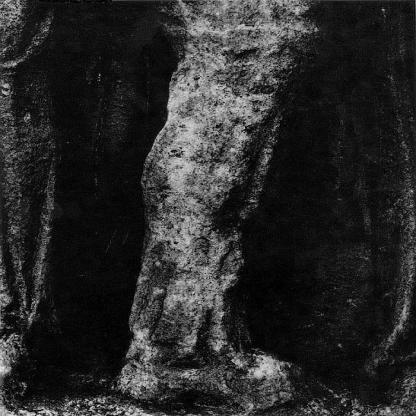

In [4]:
print(image_data[0]['image_file_path'])

image_data[0]['image']

In [5]:
image_data.features['labels']

ClassLabel(names=['Realism', 'Art_Nouveau_Modern', 'Analytical_Cubism', 'Cubism', 'Expressionism', 'Action_painting', 'Synthetic_Cubism', 'Symbolism', 'Ukiyo_e', 'Naive_Art_Primitivism', 'Post_Impressionism', 'Impressionism', 'Fauvism', 'Rococo', 'Minimalism', 'Mannerism_Late_Renaissance', 'Color_Field_Painting', 'High_Renaissance', 'Romanticism', 'Pop_Art', 'Contemporary_Realism', 'Baroque', 'New_Realism', 'Pointillism', 'Northern_Renaissance', 'Early_Renaissance', 'Abstract_Expressionism'], id=None)

In [6]:
%%time
def map_filenames(example):
    example['image_file_path'] = example['image_file_path'].split('/')[-1]
    return example

image_data = image_data.map(map_filenames)

Map:   0%|          | 0/4493 [00:00<?, ? examples/s]

CPU times: user 378 ms, sys: 231 ms, total: 610 ms
Wall time: 788 ms


In [7]:
image_data[0]['image_file_path']

'aaron-siskind_rome-arch-of-constantine-10-1963_jpg.rf.ebd64ac83f5a7b1b458334d4603e7791.jpg'

In [12]:
%%time

def map_embeddings(example):
    example['embeddings'] = embed_model.encode(example['image'], device='cuda')
    return example['embeddings']

image_data_embed = image_data.map(lambda example: {'embeddings': embed_model.encode(example['image'], device='cuda')}, batched=True, batch_size=64)

image_data_embed

Map:   0%|          | 0/4493 [00:00<?, ? examples/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 57.1 s, sys: 3.59 s, total: 1min
Wall time: 57.4 s


Dataset({
    features: ['image_file_path', 'image', 'labels', 'embeddings'],
    num_rows: 4493
})

In [13]:
image_data_embed.add_faiss_index(column='embeddings')
image_data_embed

  0%|          | 0/5 [00:00<?, ?it/s]

Dataset({
    features: ['image_file_path', 'image', 'labels', 'embeddings'],
    num_rows: 4493
})

In [14]:
image_data_embed[0]['embeddings']

[0.034974753856658936,
 0.3421086072921753,
 -0.1404361128807068,
 -0.16927160322666168,
 -0.03889720141887665,
 -0.09360802173614502,
 0.21657082438468933,
 0.44953495264053345,
 0.16786587238311768,
 0.4352000951766968,
 -0.5079814791679382,
 -0.2319977730512619,
 -0.1277860701084137,
 -0.1335797905921936,
 -0.3023132383823395,
 -0.24641045928001404,
 0.23229005932807922,
 0.2577497661113739,
 0.0737742930650711,
 0.5170651078224182,
 -0.18848949670791626,
 0.7846620678901672,
 0.16885167360305786,
 0.29778164625167847,
 0.25633901357650757,
 0.2995547652244568,
 -0.06352122128009796,
 0.4736674726009369,
 0.21303986012935638,
 -0.2826078534126282,
 -0.187757208943367,
 -0.2752440273761749,
 -0.20446985960006714,
 0.12847216427326202,
 -0.2771369516849518,
 -0.25621020793914795,
 -0.38943397998809814,
 -0.39731064438819885,
 0.25938576459884644,
 -0.18348363041877747,
 -0.5960308909416199,
 0.09097062051296234,
 0.14393126964569092,
 -0.04274466633796692,
 -0.12003029882907867,
 -0.5

In [16]:
%%time

# text prompt or search term
prompt = embed_model.encode("man sitting")

simscore, ret_images = image_data_embed.get_nearest_examples("embeddings", prompt, k=5)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 41.9 ms, sys: 3.16 ms, total: 45.1 ms
Wall time: 41.5 ms


In [39]:
def get_similar_images(model: SentenceTransformer, query: str, dataset, k_image: int):
    stime = time.time()
    prompt = model.encode(query)
    similarity_score, images_embeddings = dataset.get_nearest_examples(
        "embeddings", prompt, k=k_image
    )
    latency = time.time() - stime
    print(f"Retrieved {k_image} and similarity scores in {latency}")
    return similarity_score, images_embeddings


def image_grid(image_list):
    pyplot.figure(figsize=(20, 20))
    columns = 2
    for k in range(len(image_list)):
        image = image_list["image"][k]
        pyplot.subplot(int(len(image_list) / columns + 1), int(columns), int(k + 1))
        pyplot.imshow(image)

In [ ]:
%%time

scores, images = get_similar_images(embed_model, "children", image_data_embed, 6)

image_grid(images)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved 6 and similarity scores in 0.0476224422454834
CPU times: user 134 ms, sys: 4.18 ms, total: 138 ms
Wall time: 135 ms
